In [1]:
import sys
import os

In [2]:
code_dir = os.environ.get('HALITE_PATH')

In [3]:
if not code_dir:
    code_dir = '/'.join(os.getcwd().split('/')[:-1] + ['code'])

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
sys.path.append(code_dir)

In [128]:
from kaggle_environments import make
from kaggle_environments.envs.halite.helpers import Board, ShipAction, ShipyardAction, Observation
from halite_env import HaliteEnv
from ship_state_wrapper import ShipStateWrapper
from shipyard_state_wrapper import ShipYardStateWrapper
from agent import Agent
from game_runner_v2 import GameRunner
from halite_agent import HaliteAgent

In [20]:
from play import train_agent, play_games

In [21]:
# https://www.kaggle.com/tiger37/reinforcement-learning-meets-halite

In [22]:
# reward_results = train_agent(10, 400)

In [26]:
results = play_games(3, 100)

configuration
{'episodeSteps': 400, 'actTimeout': 3, 'runTimeout': 9600, 'startingHalite': 24000, 'size': 21, 'spawnCost': 500, 'convertCost': 500, 'moveCost': 0, 'collectRate': 0.25, 'regenRate': 0.02, 'maxCellHalite': 500, 'agentTimeout': 60, 'randomSeed': 2084407520}
{'episodeSteps': 400, 'actTimeout': 3, 'runTimeout': 9600, 'startingHalite': 24000, 'size': 21, 'spawnCost': 500, 'convertCost': 500, 'moveCost': 0, 'collectRate': 0.25, 'regenRate': 0.02, 'maxCellHalite': 500, 'agentTimeout': 60, 'randomSeed': 2084407520}
Initialized state wrappers
486
244
Initialized agents
Initialized trainer
Resetting env
Episode start
[[5000, {}, {'0-1': [110, 0]}], [5000, {}, {'0-2': [120, 0]}], [5000, {}, {'0-3': [320, 0]}], [5000, {}, {'0-4': [330, 0]}]]
Game: 0, Step: 8
action values
[ 69.037636  66.85181   96.58377  -53.965958   1.868442  57.23401 ]
top_action_index
2
actions
[0. 0. 1. 0. 0. 0.]
Game: 0, Step: 15
action values
[ 77.06576   67.962746 106.31631  -58.127884   4.749551  64.62034 ]

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [29]:
all_scores = results['all_scores']
ship_agent = results['ship_agent']
shipyard_agent = results['shipyard_agent']

In [31]:
rewards = all_scores

In [32]:
len(rewards)

3

/Users/zahidpanjwani/.pyenv/versions/3.6.0/envs/ipython3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


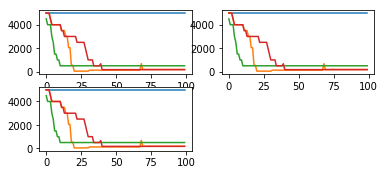

In [33]:
i = 0
for episode in rewards[-5:]:
    i += 1
    episode = np.array(episode)
    for j in range(episode.shape[1]):
        plt.subplot(3, 2, i)
        sns.lineplot(x=range(0, episode.shape[0]), y=episode[:, j])

In [46]:
environment = make('halite', {}, debug=True)

In [40]:
trainer = environment.train([None, "random"])

In [129]:
ship_state_wrapper = ShipStateWrapper(
    radius=4,
    max_frames=2,
    map_size=1
)
shipyard_state_wrapper = ShipYardStateWrapper(
    radius=4,
    max_frames=1,
    map_size=1
)

In [147]:
halite_env = HaliteEnv(
    opponents=3,
    ship_state_wrapper=ship_state_wrapper,
    shipyard_state_wrapper=shipyard_state_wrapper,
    radius=4,
    environment=None,
    trainer=None
)

In [148]:
halite_agent = HaliteAgent(
    configuration=environment.configuration,
    halite_env=halite_env,
    ship_agent=ship_agent,
    shipyard_agent=shipyard_agent,
    training=False,
    verbose=False,
    ship_frame_stack_len=2
)

In [149]:
from kaggle_environments.envs.halite.helpers import Board, Observation

In [133]:
def halite_run_agent(observation, configuration):
    
    halite_agent.env.ship_state_wrapper.set_map_size(configuration['size'])
    halite_agent.env.shipyard_state_wrapper.set_map_size(configuration['size'])
    
    raw_observation = observation
    step_observation = Observation(observation)
    
    raw_observation, shipyard_simulated_step_memory = halite_agent.get_moves_for_all_shipyards(
        raw_observation=raw_observation,
        step_observation=step_observation,
        episode_number=0,
        step_number=0
    )

    raw_observation, ship_simulated_step_memory = halite_agent.get_moves_for_all_ships(
        raw_observation=raw_observation,
        step_observation=step_observation,
        episode_number=0,
        step_number=0
    )

    actions_for_step = halite_agent.actions_for_step
    return actions_for_step

In [143]:
run_result = environment.run([halite_run_agent, "random", "random", "random"])

In [146]:
len(run_result)

400

In [145]:
run_result[-1]

[{'action': {},
  'reward': None,
  'info': {},
  'observation': {'halite': [500,
    500,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    500,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    500,
    500,
    500,
    500,
    500,
    0.0,
    0.0,
    0.0,
    0.0,
    500,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    500,
    0.0,
    0.0,
    0.0,
    0.0,
    500,
    500,
    500,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    500,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    500,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    500,
    0.0,
    0.0,
    500,
    500,
    500,
    500,
    500,
    500,
    500,
    500,
    500,
    0.0,
    0.0,
    500,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    500,
    0.0,
    0.0,
    500,
    0.0,
    500,
    0.0,
    500,
    0.0,
    0.0,
    500,
    0.0,
    0.0,
    0.0,


In [124]:
trainer = environment.train([None, "random"])

In [125]:
state = trainer.reset()

In [126]:
state.keys()

dict_keys(['remainingOverageTime', 'step', 'player', 'halite', 'players'])

In [150]:
halite_run_agent(state, environment.configuration)

Game: 0, Step: 0
action values
[ 21.112043   11.77617    24.693785  -83.72758     1.6624565 -45.48086  ]
top_action_index
2
actions
[0. 0. 1. 0. 0. 0.]


{'0-1': 'EAST'}

In [64]:
observation, game_reward, terminal = step_results

[{'action': None,
  'reward': None,
  'info': {},
  'observation': {'halite': [35.7,
    62.22,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    206.04,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    62.22,
    35.7,
    42.84,
    160.14,
    97.92,
    0.0,
    0.0,
    0.0,
    0.0,
    412.08,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    412.08,
    0.0,
    0.0,
    0.0,
    0.0,
    97.92,
    160.14,
    42.84,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    10.2,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    10.2,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    33.66,
    0.0,
    0.0,
    32.64,
    72.42,
    53.04,
    2.04,
    30.6,
    2.04,
    53.04,
    72.42,
    32.64,
    0.0,
    0.0,
    33.66,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    19.38,
    0.0,
    0.0,
    15.3,
    0.0,
    70.38,
    0.0,
    15